**Lgistic regression** works such as linear regression, but it uses sigmoid function to set y values to 0-1

**y = sigmoid(x*weights + bias)**

**sigmoid(x) = 1 / (1 + exp(-x))**

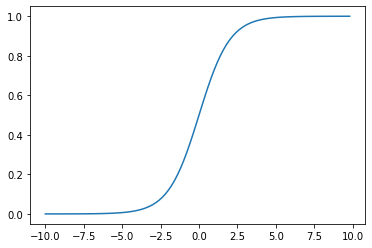

In [17]:
# example of sigmiod function
import math


def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

In [5]:
# Basic imports

import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random
from IPython.core.display import display,Image
from string import Template
import IPython.display
import warnings

In [6]:
class LogisticRegression():
    
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    # function to fit weights and bias | gradient descent
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient decsent | in each iteration weights and bias is updated
        for i in range(self.n_iters):
            # predict for current values and use sigmoid function
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # graduents
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # Compute answer using fitted weights and bias and sigmoid function
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted = [0 if i <= 0.5 else 1 for i in y_predicted]
        
        return y_predicted
    
    # sigmoid function to set all values between 0 and 1
    def sigmoid(self, X):
        return (1 / (1 + np.exp(-X)))

In [13]:
# testing logistic regression

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

regressor = LogisticRegression(learning_rate=0.0001,n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print("Accuracy: ",accuracy(y_test, predictions))

Accuracy:  0.9298245614035088
